# **Hypothesis testing**

## Business goals: promotion response

* Which segments are more likely to respond to promotional events (i.e., use promo codes or discounts)?

* What customer attributes correlate with higher spending during promotions?




# **Core statistical concepts in data analysis**

Use of LMS and ChatGPT to provide below definitions: 

* Mean is the arithmetic average of a dataset, calculated by summing all values and dividing by the number of observations.

* Median is the middle value of an ordered dataset. Particularly good at identifying skewed data or outliers.

* Standard deviation measures the spread of data points from the mean.

* Hypothesis testing is a statistical method used to evaluate assumptions (hypotheses) about a population using sample data. It involves calculating the p-value to determine if observed results are statistically significant or could have occurred by chance.

* Basic probability provides a framework for quantifying the likelihood of outcomes and managing uncertainty in data analysis.

Together, these concepts are essential tools for extracting insights, identifying patterns and drawing reliable conclusions that support informed, data-driven decisions.


* Import Pandas and Numpy libraries.

In [24]:
import pandas as pd
import numpy as np

* Read csv file and convert into a DataFrame using function 'pd.read_csv()'.

In [3]:
import pandas as pd
df_cleaned = pd.read_csv('../jupyter_notebooks/final/cleaned_shopping_trends_and_customer_behaviour_dataset.csv') 
df_cleaned

,age,age_group,gender,item_purchased,category,purchase_amount_(usd),location,colour,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,55,Pre-Retirement,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Bi-Weekly
1,19,Gen Z,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Bi-Weekly
2,50,Gen X Late,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Gen X Late,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Gen X Early,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Gen X Late,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Gen X Late,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Gen X Early,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# **Statistical tests**

* ChatGPT was used to generate below hypothesis and the code to run the statistical calculation.

**H1: Younger customer groups use promo codes more often than older groups.**

* H₀ (**Null hypothesis**):
There is no difference in promo code usage between younger and older customer groups.

* H₁ (**Alternative hypothesis**):
Younger customer groups use promo codes more often than older groups.



**H2: Female customers are more likely to use discounts than male customers.**

* H₀ (**Null hypothesis**):
There is no difference in discount usage between female and male customers.

* H₁ (**Alternative hypothesis**):
Female customers are more likely to use discounts than male customers.



**H3: Customers who use discounts tend to spend more per purchase.**

* H₀ (**Null hypothesis**):
Customers who use discounts and those who don’t have the same average purchase amount.

* H₁ (**Alternative hypothesis**):
Customers who use discounts have a higher average purchase amount per transaction.



**H4: Season affects promotion response (e.g., more promo code use during Winter sales).**

* H₀ (**Null hypothesis**):
Promotion response is the same across all seasons — season has no effect.

* H₁ (**Alternative hypothesis**):
Promotion response varies by season; season does affect promo code use.

In [1]:
# import scipy library to initiate statistical analysis and hypothesis testing
import scipy.stats as stats

**1.  H1: Younger customer groups use promo codes more often than older groups.**

* H₀ (**Null hypothesis**):
There is no difference in promo code usage between younger and older customer groups.

* H₁ (**Alternative hypothesis**):
Younger customer groups use promo codes more often than older groups.

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces (e.g., " Yes " becomes "Yes").
# .str.lower() converts the entire string to lowercase (e.g., "Yes" becomes "yes").

df_cleaned['promo_code_used'] = df_cleaned['promo_code_used'].str.strip().str.lower()

# pd.crosstab() creates a contingency table that shows the frequency counts of 
# promo code usage (yes/no) across different age groups.
# stats.chi2_contingency() performs the Chi-squared test of independence on the
# contingency table created above.
# The two underscores _, _ represent expected frequencies and degrees of freedom,
# which are not needed here but are returned by default.
h1_table = pd.crosstab(df_cleaned['age_group'], df_cleaned['promo_code_used'])
h1_chi2, h1_p, _, _ = stats.chi2_contingency(h1_table)

# Display results
print("H1 - Age Group vs Promo Code Usage:")
print("Chi² Stat:", h1_chi2)
print("p-value:", h1_p)
print("Significant:", h1_p < 0.05)
print("\n")
# print("\n") creates a blank line in the output.

H1 - Age Group vs Promo Code Usage:
Chi² Stat: 1.0887155051993171
p-value: 0.9550976431155631
Significant: False




In [14]:
print(pd.crosstab(df_cleaned['age_group'], df_cleaned['promo_code_used'])) 

promo_code_used   No  Yes
age_group                
Gen X Early      413  316
Gen X Late       440  312
Gen Z            279  207
Millennials      429  326
Pre-Retirement   422  329
Seniors          240  187


**Outcome**: non statistically significant. Accept the null hypothesis and reject the alternative hypothesis.

**Conclusion:**

* There is no statistically significant association between age group and promo code usage. The p-value (0.955) is much greater than the typical threshold of 0.05, suggesting that any observed differences in promo code usage across age groups are likely due to chance.

* This means the data does not support the hypothesis that younger customer groups use promo codes more frequently than older ones. 

**2. H2: Female customers are more likely to use discounts than male customers.**

* H₀ (**Null hypothesis**):
There is no difference in discount usage between female and male customers.

* H₁ (**Alternative hypothesis**):
Female customers are more likely to use discounts than male customers.

In [ ]:
# Clean and preprocess columns

# .str.strip() removes any leading or trailing spaces (e.g., " Yes " becomes "Yes").
# .str.lower() converts the entire string to lowercase (e.g., "Yes" becomes "yes").

df_cleaned['discount_applied'] = df_cleaned['discount_applied'].str.strip().str.lower()

# pd.crosstab() creates a contingency table that shows the frequency counts of 
# discount usage (yes/no) by gender.
# stats.chi2_contingency() performs the Chi-squared test of independence on the
# contingency table created above.
# The two underscores _, _ represent expected frequencies and degrees of freedom,
# which are not needed here but are returned by default.
h2_table = pd.crosstab(df_cleaned['gender'], df_cleaned['discount_applied'])
h2_chi2, h2_p, _, _ = stats.chi2_contingency(h2_table)

# Display results
print("H2 - Gender vs Discount Usage:")
print("Chi² Stat:", h2_chi2)
print("p-value:", h2_p)
print("Significant:", h2_p < 0.05)
print("\n")
# print("\n") creates a blank line in the output.

H2 - Gender vs Discount Usage:
Chi² Stat: 1381.9413463923058
p-value: 1.7645380691667684e-302
Significant: True




In [13]:
print(pd.crosstab(df_cleaned['gender'], df_cleaned['discount_applied'])) 

discount_applied    No   Yes
gender                      
Female            1248     0
Male               975  1677


**Outcome**: statistically significant. Reject the null hypothesis and accept the alternative hypothesis.

**Conclusion:**

* The result is statistically significant, with a very low p-value, indicating a strong association between gender and discount usage. However, the pattern contradicts the hypothesis: while the hypothesis stated that female customers are more likely to use discounts, the data shows that male customers are overwhelmingly more likely to apply discounts (1,677 males vs. 0 females).

* This suggests either a data issue (e.g., missing or misclassified discount records for female customers) or a genuine trend in the dataset that should be further investigated. 

**3. H3: Customers who use discounts tend to spend more per purchase.**

* H₀ (**Null hypothesis**):
Customers who use discounts and those who don’t have the same average purchase amount.

* H₁ (**Alternative hypothesis**):
Customers who use discounts have a higher average purchase amount per transaction.

In [ ]:
# group1: filters the dataset on customers who used a discount and extracts the corresponding purchase amount. It then stores the result in variable group1.
# group2: filters the dataset on customers who did not use a discount and extracts the corresponding purchase amount. It then stores the result in variable group2.
# performs an independent two-sample t-test using scipy.stats.ttest_ind() 
# to compare the average purchase amount between the two groups.
# equal_var=False tells Python to use Welch’s t-test, which is better when the two groups might have unequal variances or unequal sample sizes.
# h3_t: the t-statistic
# h3_p: the p-value
group1 = df_cleaned[df_cleaned['discount_applied'] == 'yes']['purchase_amount_(usd)']
group2 = df_cleaned[df_cleaned['discount_applied'] == 'no']['purchase_amount_(usd)']
h3_t, h3_p = stats.ttest_ind(group1, group2, equal_var=False)

# Display results
print("H3 - Discount vs Spend:")
print("p-value:", h3_p)
print("t-Statistic:", h3_t)
print("Significant:", h3_p < 0.05)
print("\n")
# print("\n") creates a blank line in the output.

H3 - Discount vs Spend:
p-value: 0.26611244488939256
t-Statistic: -1.1122316185807992
Significant: False




**Outcome**: non statistically significant. Accept the null hypothesis and reject the alternative hypothesis.

* Mean Purchase (Discount = Yes): $59.28
* Mean Purchase (Discount = No): $60.13

**Conclusion:**

* The difference in average spending between customers who used discounts versus those who did not is not statistically significant (p = 0.266 > 0.05).
This means the data does not support the hypothesis that customers who use discounts tend to spend more per purchase. 


**4. H4: Season affects promotion response (e.g., more promo code use during Winter sales).**

* H₀ (**Null hypothesis**):
Promotion response is the same across all seasons — season has no effect.

* H₁ (**Alternative hypothesis**):
Promotion response varies by season; season does affect promo code use.

In [4]:
# pd.crosstab() creates a contingency table that shows the frequency counts of 
# promo code used (yes/no) by season.
# stats.chi2_contingency() performs the Chi-squared test of independence on the
# contingency table created above.
# The two underscores _, _ represent expected frequencies and degrees of freedom,
# which are not needed here but are returned by default.
h4_table = pd.crosstab(df_cleaned['season'], df_cleaned['promo_code_used'])
h4_chi2, h4_p, _, _ = stats.chi2_contingency(h4_table)

# Display results
print("H4 - Season vs Promo Code Usage:")
print("Chi² Stat:", h4_chi2)
print("p-value:", h4_p)
print("Significant:", h4_p < 0.05)
print("\n")
# print("\n") creates a blank line in the output.

H4 - Season vs Promo Code Usage:
Chi² Stat: 3.1687022338896487
p-value: 0.3663388240993125
Significant: False




In [12]:
print(pd.crosstab(df_cleaned['season'], df_cleaned['promo_code_used'])) 

promo_code_used   No  Yes
season                   
Fall             578  397
Spring           559  440
Summer           532  423
Winter           554  417


**Outcome**: non statistically significant. Accept the null hypothesis and reject the alternative hypothesis.

**Conclusion:**

* The data does not provide statistically significant evidence that promo code usage varies by season. The p-value (0.366) is greater than 0.05, meaning any observed differences in promotional response across seasons are likely due to random variation rather than a meaningful pattern. Therefore, the alternative hypothesis is not supported by the data.

**Personal reflexion**: had this been in a real working environment, I would have questioned the integrity of the data. Across all seasons, count of promo code used (No) > count of promo code used (Yes). I was expecting the opposite in purchasing behaviour. Usually, promotional events drive an increase in sales.  

* count of promo code used (No) = 2223
* count of promo code used (Yes) = 1677

# **Visualisation for each hypothesis**

* Import of Python data visualisation libraries

In [5]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
# Sets the default Seaborn plot style.
# "whitegrid" adds a clean white background with gridlines, which improves 
# readability for charts that display distributions or comparisons.

In [7]:
import plotly.express as px

* Python code for visualisation was generated with the assistance of Chatgpt.
* Chatgpt was also used to troubleshoot the errors I received initially on some of the graphs.

**1.  H1: Younger customer groups use promo codes more often than older groups.**

* Initially, when I tried to create my matplotlib graph, encountered an issue where I was alerted that matplotlib was not installed. Since I still encountered the issue despite installing it in the terminal, one of the SME Data coaches suggested to install by using notebook cell. Since the graph was still not generating, pushed through the changes to my Github account for the technical team to have another look. While this was happening, realised that I had not restarted the Kernel (an oversight on my part). After restarting the Kernel, graph generated as expected. 

In [50]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 1000x600 with 0 Axes>

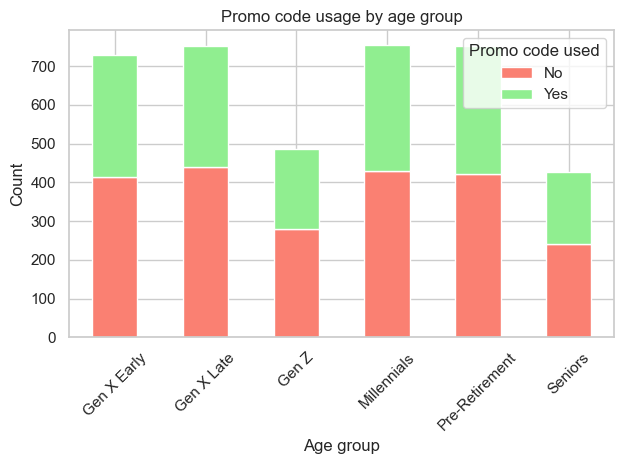

In [8]:
# Create a crosstab of promo code usage by age group
age_promo_counts = pd.crosstab(df_cleaned['age_group'], df_cleaned['promo_code_used'])

# Plot using matplotlib
plt.figure(figsize=(10, 6))
age_promo_counts.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])

plt.title("Promo code usage by age group")
plt.xlabel("Age group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Promo code used")
plt.tight_layout()
plt.show()

* Promo code usage by age group (H1) shows if younger groups (e.g., Gen Z, Millennials) use more promo codes than other groups. Gen Z and Seniors are the 2 groups that used less promo codes in relation to the other groups.

* The bar chart also helps visualise the discrepancy in the data. The orange section (no promo code used) is bigger than the green section (promo code used) which seems unlogical. 

**2. H2: Discount usage by gender**

In [20]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


* When running the code initially, faced an error. To resolve error: 'ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed', needed to run '%pip install nbformat>=4.2.0' as a code first. Plotly graph now displaying correctly. Breakfix advised by a fellow student (Jane Weightman).

In [9]:
h2_plot_data = df_cleaned.groupby(['gender', 'discount_applied']).size().reset_index(name='count')

# Create Plotly bar chart
fig = px.bar(
    h2_plot_data,
    x="gender",
    y="count",
    color="discount_applied",
    barmode="group",
    title="Discount usage by gender (interactive)",
    labels={"discount_applied": "Discount Applied", "count": "Number of Customers"}
)

# Show the figure
fig.show()

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


* Discount usage by gender (H2) highlights gender differences in using discounts. Males were the ones who made the most use of discounts compared to women who did not use discounts at all.

* Plotly graphs are also very impactful during presentations since they allow to hoover over the information and convey the message at the same time. In here, we can clearly see a discrepancy in the data where none of the purchases made by female customers were made using discount codes. This pattern is highly unusual.

3. **H3: Purchase amount by discount usage**

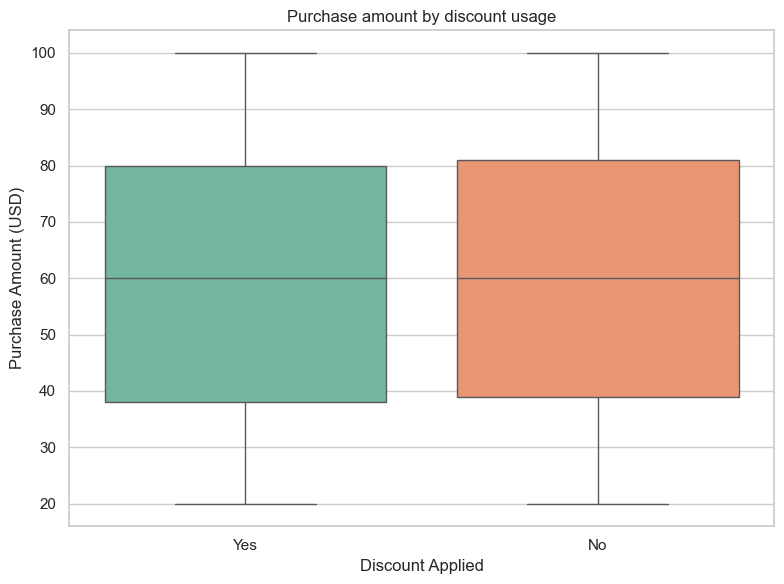

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='discount_applied', y='purchase_amount_(usd)', hue='discount_applied', palette='Set2', legend=False)
plt.title("Purchase amount by discount usage")
plt.xlabel("Discount Applied")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()

* Purchase amount by discount usage (H3) uses a boxplot to compare spending behaviour with and without discounts.

* The boxplot summarises perfectly the discrepancy in the dataset. The use of a discount code does not seem to have any effect in the overall purchase amount. Average spend is exactly the same irrespective if a discount code was used or not during the transaction. Once again, this pattern is highly unusual as you would expect the amount per transaction to increase vs when no discount was used as usually these promotional campaigns drive sales.

* The bar at the top and bottom highlights the minimum and maximum spend. In our dataset, the lowest amount per transaction was $20 and the maximum amount per transaction was $100. The bar in the middle highlights the average spend, in this instance $60.

**4. H4: Promo code usage by season**

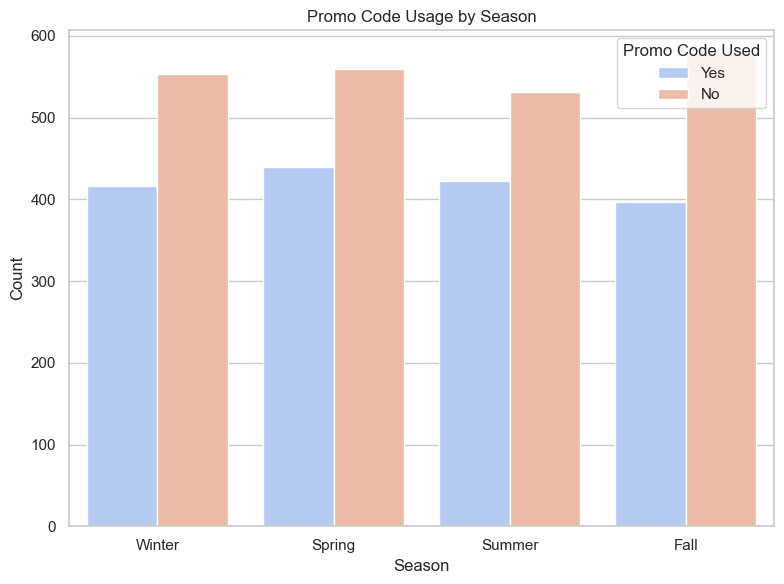

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='season', hue='promo_code_used', palette='coolwarm')
plt.title("Promo Code Usage by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(title="Promo Code Used")
plt.tight_layout()
plt.show()

* Promo code usage by season (H4) helps identify seasonal patterns in promo code usage. As stated earlier, across all seasons, promotional events do not seem to have an effect on customer purchase behaviour. Based on the graph, promotional codes used in descending order (highest to lowest): Spring, Summer, Winter, Fall.

* This plot chart summarises perfectly the discrepancy in the data. The pink section (no promo code used) is higher than the blue one where a promo code was used. This pattern is very unusual as you would expect the dataset to show the opposite.

# **Customer segmentation**

* Based on the dataset, opted for clustering to segment customers into groups with similar behaviours.

*  Clustering can help group similar customers for targeted marketing, promotions or personalised experiences.

* We will use Scikit-learn for this. **All codes for this section were generated with the help of Chatgpt.**

**1. Step 1: import StandardScaler and KMeans**

In [ ]:
# StandardScaler is used to standardise or normalise data to avoid features with
# larger ranges dominate the clustering results.
# It transforms features so that they have a mean of 0 a standard deviation of 1.
# Standardising puts all features on the same scale, so no single feature 
# overpowers the others and the algorithm treats each feature equally.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**2. Step 2: select relevant features for clustering**

In [ ]:
# Features for clustering stored in variable features
features = ['age', 'purchase_amount_(usd)', 'review_rating']
# Extract the features from df_cleaned DataFrame and store it in variable X.
X = df_cleaned[features]

# Standardise the features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# This line standardises the features stored in the variable X using the 
# StandardScaler stored in the variable scaler.
# It calculates the mean and standard deviation for each feature (e.g. age, 
# purchase amount, review rating). Then, transforms each feature to have 
# a mean of 0 and a standard deviation of 1.

**3. Step 3: use the elbow method to determine optimal clusters (K)**

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will cha

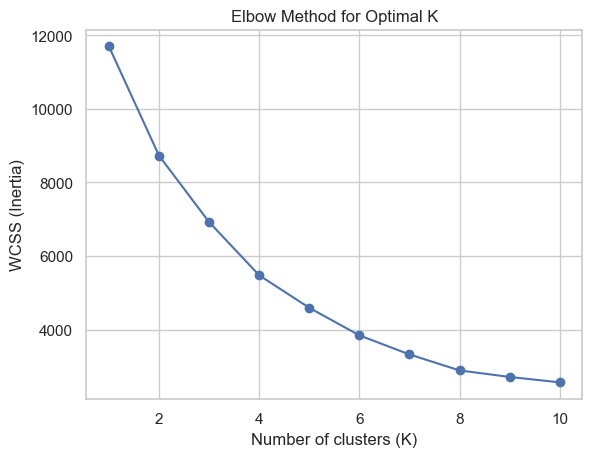

In [17]:
wcss = []
# Creates an empty list to store the WCSS (Within-Cluster Sum of Squares) for 
# each value of K.

K_range = range(1, 11)
# Defines a range of cluster numbers to test from 1 to 10 and stores in the variable
# K_range.
# These are the K values that will be evaluated in the elbow method.

for k in K_range:
# starts a loop that iterates over each value of k (number of clusters).

    kmeans = KMeans(n_clusters=k, random_state=42)
# for each k, it creates a new KMeans model with that number of clusters.
# random_state=42 ensures reproducibility, the same random initialization
# every time the code is run.

    kmeans.fit(X_scaled)
# Fits the KMeans model to the standardised dataset (X_scaled).
# The model assigns each data point to a cluster and computes the cluster centers.

    wcss.append(kmeans.inertia_)
# kmeans.inertia_ is the WCSS for the current number of clusters k.
# This value is appended to the wcss list for later plotting.

plt.plot(K_range, wcss, marker='o')
# Plots K_range on the x-axis and the corresponding WCSS values on the y-axis.
# marker='o' adds dots at each data point for clarity.

plt.title('Elbow Method for Optimal K')
# Adds a title to the plot.

plt.xlabel('Number of clusters (K)')
# Labels the x-axis as “Number of clusters (K)”.

plt.ylabel('WCSS (Inertia)')
# Labels the y-axis as “WCSS (Inertia)”.

plt.grid(True)
# Adds a grid to the plot to make it easier to read.

plt.show()
# Displays the plot.

Based on the plot above, the optimal number of clusters is 3 to 4 clusters. 

**4. Step 4: apply K-Means clustering**

In [32]:
# Creates a KMeans clustering model from scikit-learn.
# n_clusters=3 tells the model to divide the data into 3 clusters 
# (based on elbow analysis).
# random_state=42 ensures reproducible results, the same initialisation and 
# outcome every time the code is run.

kmeans = KMeans(n_clusters=3, random_state=42)


# Fits the KMeans model on the standardised dataset X_scaled (with columns: age,
# purchase_amount_(usd), review_rating).
# Predicts which cluster (0, 1 or 2) each customer belongs to.
# The predicted cluster labels (0, 1 or 2) are then added as a new column called 
# 'cluster' in DataFrame df_cleaned.
# Each row now includes a cluster value showing the group it was assigned to.

df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)


# Counts how many data points (customers) were assigned to each of the 3 clusters.
# Total count for the 3 clusters is 3900, which is the total number of customers in the dataset.

print(df_cleaned['cluster'].value_counts())

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



cluster
2    1484
1    1226
0    1190
Name: count, dtype: int64


**5. Step 5: visualize the clusters**

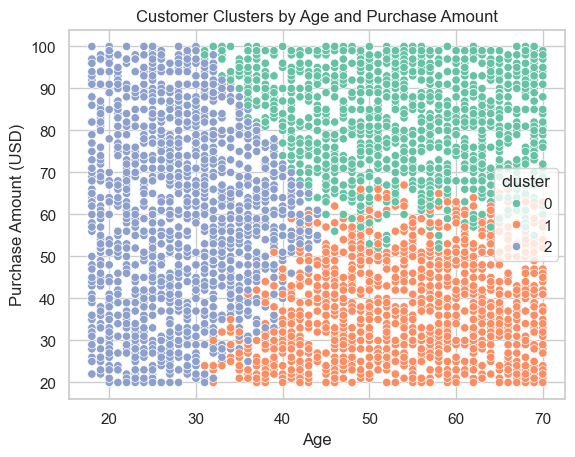

In [ ]:
# sns.scatterplot is used to create a scatter plot of the data.
# It plots the 'age' on the x-axis and 'purchase_amount_(usd)' on the y-axis.
# The 'hue' parameter is set to 'cluster', which means the points will be coloured based on their cluster assignment. 

sns.scatterplot(data=df_cleaned, x='age', y='purchase_amount_(usd)', hue='cluster', palette='Set2')


# # Adds a title to the plot.
plt.title('Customer Clusters by Age and Purchase Amount')

# Labels the x-axis as 'Age'.
plt.xlabel('Age')

# Labels the y-axis as 'Purchase Amount (USD).
plt.ylabel('Purchase Amount (USD)')

# Adds a grid to the plot to make it easier to read.
plt.grid(True)

# Displays the plot.
plt.show()

Based on the scatterplot results, the optimum customer segmentation is as follows:

**Cluster 2**: age <= 40 years old; purchase amount = All

**Cluster 1**: age > 40 years old; purchase amount <= 60 USD

**Cluster O**: age > 40 years old; purchase amount > 60 USD

This is not the perfect customer segmentation by no means (noisy data) but the best that could be achieved based on the attributes selected for clustering.

**6. Step 6: reproduce the results with 4 clusters for comparison.**

In [35]:
# Creates a KMeans clustering model from scikit-learn.
# n_clusters=4 tells the model to divide the data into 4 clusters 
# (based on elbow analysis).
# random_state=42 ensures reproducible results, the same initialisation and 
# outcome every time the code is run.

kmeans = KMeans(n_clusters=4, random_state=42)


# Fits the KMeans model on the standardised dataset X_scaled (with columns: age,
# purchase_amount_(usd), review_rating).
# Predicts which cluster (0, 1, 2 or 3) each customer belongs to.
# The predicted cluster labels (0, 1, 2 or 3) are then added as a new column called 
# 'cluster' in DataFrame df_cleaned.
# Each row now includes a cluster value showing the group it was assigned to.

df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)


# Counts how many data points (customers) were assigned to each of the 4 clusters.
# Total count for the 4 clusters is 3900, which is the total number of customers in the dataset.

print(df_cleaned['cluster'].value_counts())

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



cluster
3    984
2    980
0    970
1    966
Name: count, dtype: int64


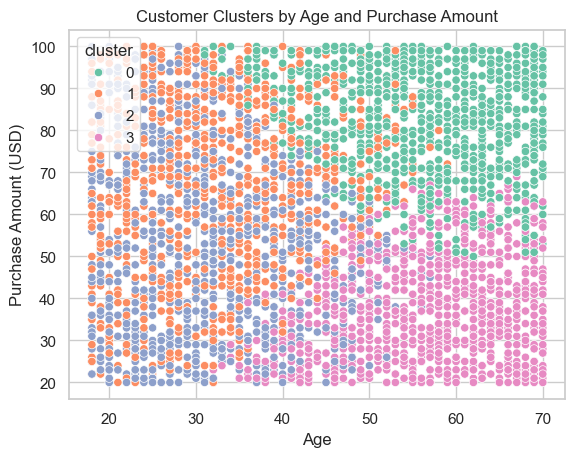

In [ ]:
# sns.scatterplot is used to create a scatter plot of the data.
# It plots the 'age' on the x-axis and 'purchase_amount_(usd)' on the y-axis.
# The 'hue' parameter is set to 'cluster', which means the points will be coloured based on their cluster assignment. 

sns.scatterplot(data=df_cleaned, x='age', y='purchase_amount_(usd)', hue='cluster', palette='Set2')


# Adds a title to the plot.
plt.title('Customer Clusters by Age and Purchase Amount')

# Labels the x-axis as 'Age'.
plt.xlabel('Age')

# Labels the y-axis as 'Purchase Amount (USD)'.
plt.ylabel('Purchase Amount (USD)')

# Adds a grid to the plot to make it easier to read.
plt.grid(True)

# Displays the plot.
plt.show()

Clustering the data into 4 clusters only amplifies the noisy data element. There is no value added creating 4 customer segments. 

I then decided to run a silhouette score to validate the elbow results of 3 optimal clusters (K).

In [ ]:
# Import the silhouette_score function from the sklearn.metrics module in the 
# scikit-learn library.
from sklearn.metrics import silhouette_score

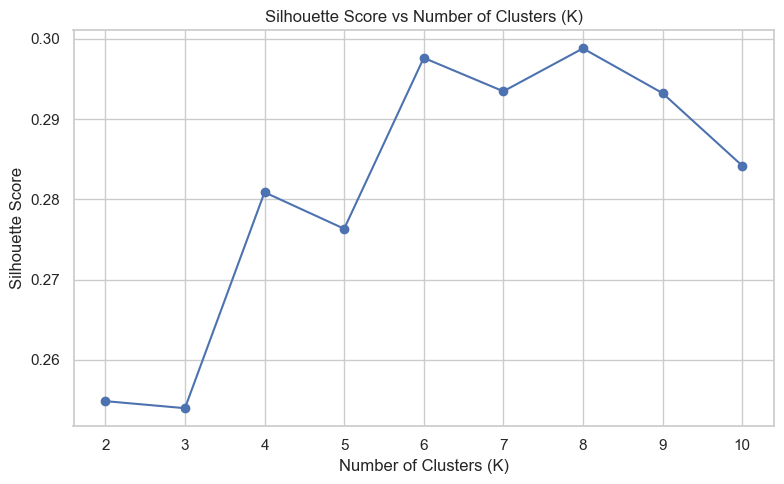

In [37]:
# Extract the features from df_cleaned DataFrame and store it in new DataFrame features.
features = df_cleaned[['age', 'purchase_amount_(usd)', 'review_rating']]

# Standardise the features
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
# This line standardises the features stored in the variable features using the  
# StandardScaler stored in the variable scaler. 
# It calculates the mean and standard deviation for each feature (e.g. age,  
# purchase amount, review rating). Then, transforms each feature to have  
# a mean of 0 and a standard deviation of 1. 


# random_state=42 ensures reproducible results, the same initialisation and 
# outcome every time the code is run.
np.random.seed(42)


# Take a random sample of 1000 rows for silhouette score to avoid memory issues
# Randomly selects 1000 unique indices from the full dataset using NumPy’s random.choice.
sample_indices = np.random.choice(len(scaled_features), size=1000, replace=False)


# Grabs the actual data points from the scaled_features array using the randomly
# chosen indices. This avoids running heavy calculations on the full dataset and
# speeds-up silhouette scoring.
sampled_data = scaled_features[sample_indices]

# K = number of clusters to evaluate.
# Compute silhouette scores for K=2 to K=10 and store the silhouette score for
# each K in an empty list.
k_values = range(2, 11)
silhouette_scores = []


# Loop through each K value to compute silhouette scores.
# n_clusters=k: sets number of clusters.
# random_state=42 for reproducibility.
# Runs KMeans 10 times with different initialisations and picks the best result
# (default in recent versions of scikit-learn).
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)


# Fits the KMeans model on the sampled data and assigns a cluster label
# (0, 1, 2...) to each point.
    labels = kmeans.fit_predict(sampled_data)


# Computes the silhouette score for this K.
    score = silhouette_score(sampled_data, labels)


# Adds the score for this value of K to the silhouette_scores list.
    silhouette_scores.append(score)


# Plot the silhouette scores
# Sets up the plot area with a size of 8 x 5 inches.
plt.figure(figsize=(8, 5))


# Plots the silhouette score for each K, using a dot ('o') for each point.
plt.plot(k_values, silhouette_scores, marker='o')

# Adds a title to the plot. 
plt.title('Silhouette Score vs Number of Clusters (K)')

# Labels the x-axis as 'Number of Clusters (K)'. 
plt.xlabel('Number of Clusters (K)')

# Labels the y-axis as 'Silhouette Score'). 
plt.ylabel('Silhouette Score')

# Adds a grid to the plot to make it easier to read. 
plt.grid(True)

# automatically adjusts the spacing between elements in the plot (e.g., title,
# axis labels, ticks, legend) so that nothing overlaps or gets cut off.
plt.tight_layout()

# Displays the plot. 
plt.show()


The best K is typically the one with the highest silhouette score.

For our dataset, based on the silhouette score, the optimal number of clusters is 8. 

Before I decide on the final K, I re-run the code for the elbow method by adjusting the code to use 8 clusters.

In [38]:
# Creates a KMeans clustering model from scikit-learn.
# n_clusters=8 tells the model to divide the data into 8 clusters 
# (based on elbow analysis).
# random_state=42 ensures reproducible results, the same initialisation and 
# outcome every time the code is run.

kmeans = KMeans(n_clusters=9, random_state=42)


# Fits the KMeans model on the standardised dataset X_scaled (with columns: age,
# purchase_amount_(usd), review_rating).
# Predicts which cluster (0, 1, 2, 3, 4, 5, 6, 7 or 8) each customer belongs to.
# The predicted cluster labels (0, 1, 2, 3, 4, 5, 6, 7 or 8) are then added as a new column called 
# 'cluster' in DataFrame df_cleaned.
# Each row now includes a cluster value showing the group it was assigned to.

df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)


# Counts how many data points (customers) were assigned to each of the 8 clusters.
# Total count for the 8 clusters is 3900, which is the total number of customers in the dataset.

print(df_cleaned['cluster'].value_counts())

c:\Users\User\OneDrive\Documents\VS Code Projects\dev\Shopping-Trends\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



cluster
2    488
5    468
3    466
0    452
8    442
4    427
6    421
1    414
7    322
Name: count, dtype: int64


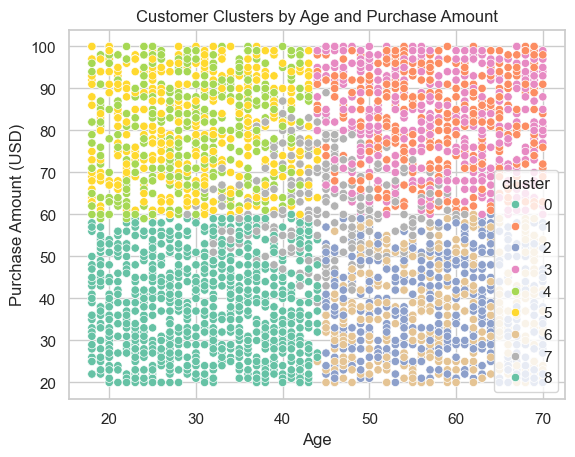

In [39]:
# sns.scatterplot is used to create a scatter plot of the data.
# It plots the 'age' on the x-axis and 'purchase_amount_(usd)' on the y-axis.
# The 'hue' parameter is set to 'cluster', which means the points will be coloured based on their cluster assignment. 

sns.scatterplot(data=df_cleaned, x='age', y='purchase_amount_(usd)', hue='cluster', palette='Set2')


# Adds a title to the plot.
plt.title('Customer Clusters by Age and Purchase Amount')

# Labels the x-axis as 'Age'.
plt.xlabel('Age')

# Labels the y-axis as 'Purchase Amount (USD)'.
plt.ylabel('Purchase Amount (USD)')

# Adds a grid to the plot to make it easier to read.
plt.grid(True)

# Displays the plot.
plt.show()

**Final conclusions and personal reflexion**

Setting-up the K value to 8 only exarcebated how noisy the data is. There is no clear separation between groups (the clusters overlap each other). 

I purposely decided not to re-engineer some of the columns to include encoded categorical features since the hypothesis testing step highlighted issues with the quality of the data. The concept of "garbage in, garbage out" could not be more accurate here. 

If this data had been given to me in a real working environment, my feedback would have been to recheck the dataset to ensure that it is correct and reflective of what the company holds in the billing system.

To conclude, since the elbow method and the silhouette score showed different results, I chose to go with the optimal K=3, as interpretability of the data was more important to me. Choosing 3 clusters gives a balance between simplicity and performance. Adding more clusters beyond K=3 doesn't significantly improve model performance but increases complexity. K=3 is a statistically sound choice. 

Pass criteria requirement **11.1 (Research and experiment with the application of data analytics tools, technologies and methodologies).**

To further clarify on this point, when I first researched data analytics techniques for my dataset and settled on clustering since I felt it was the most appropriate technique for my data, I used Chatgpt to brainstorm how best to approach this. Chatgpt initially recommended the Elbow method which I adopted as you can clearly see in this notebooks. When I visualised the clusters through the scatterplot, I noticed noise in the data/iregularity in the clusters. When I shared the results with Chatgpt, it recommended to use the DBSCAN technique as an alternative to the Elbow method. When I run the code provided by Chatgpt in VS Code to compare the results, the output was meaningless. It only produced one big compact cluster. When I prompted Chatgpt to understand why it had only produced 1 cluster, it advised that the model had not detected dense regions that met the eps and min_samples criteria. Reasons given: data too uniformly spread, not forming natural dense areas, eps too small, very few points falling within 0.5 distance of each other or too strict min_samples=5 criteria. It suggested to change the parameters (advise was to run a few tests with eps = 1.0, 1.2, 1.5, etc., and min_samples=4 to see if this would change the output in the scatterplot). When I re-run the code, I did not see any changes to the scatterplot. This is when I decided to experiment with the silhouette score to see if the technique would confirm the Elbow results or not. At the point of committing and pushing the changes to Github, I deleted the DBSCAN section since I felt it did not add any value to the analysis including it. Did not realise then that this was actually required as part of the pass assessment criteria. 

I have one commit for the customer segmentation section and a specific one around the silhouette score as I was refining my commentary.

To comply with the requirement, I have now re-instated the DBSCAN section for completness.

You will also notice that the customer segmentation section already showcases all the different experiments I conducted before finalising my conclusions.

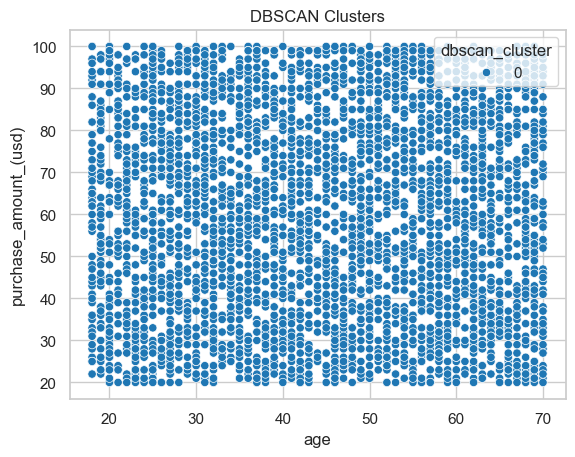

In [ ]:
# import the DBSCAN class from scikit-learn’s clustering module.
from sklearn.cluster import DBSCAN


# create DBSCAN clustering model
# eps=0.5: Maximum distance between two samples to be considered part of the
# same cluster.
# min_samples=5: Minimum number of points to form a dense region (a cluster).
dbscan = DBSCAN(eps=0.5, min_samples=5)


# fits the DBSCAN model to the scaled features (age, purchase_amount_(usd),
# review_rating).
# predicts which cluster (0, 1, 2, etc.) each customer belongs to.
# assigns each row to a cluster and stores it in a new column dbscan_cluster.
df_cleaned['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Visualise results
# plots a scatterplot showing each customer by age and purchase amount, 
# color-coded by their DBSCAN cluster label.
sns.scatterplot(data=df_cleaned, x='age', y='purchase_amount_(usd)', hue='dbscan_cluster', palette='tab10')
plt.title('DBSCAN Clusters')
plt.show()